In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
class LogitRegression:
    def __init__(self, learning_rate, iterations, lambda_param=0.01):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_param = lambda_param
        self.theta = None
        self.bias = None
        self.loss = []
        self.loss_per_iteration = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

    def cost(self, h, y):
        m = len(y)
        regularization = (self.lambda_param / (2 * m)) * np.sum(self.theta ** 2)
        return -np.mean(y * np.log(h + 1e-9) + (1 - y) * np.log(1 - h + 1e-9)) + regularization

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.bias = 0

        for i in range(self.iterations):
            z = np.dot(X, self.theta) + self.bias
            h = self.sigmoid(z)

            gradient_theta = (np.dot(X.T, (h - y)) / m) + (self.lambda_param / m) * self.theta
            gradient_bias = np.sum(h - y) / m

            self.theta -= self.learning_rate * gradient_theta
            self.bias -= self.learning_rate * gradient_bias

            cost_value = self.cost(h, y)
            self.loss.append(cost_value)

            # Store the loss for this iteration
            self.loss_per_iteration.append((i, cost_value))

            #Print loss every 1000 iterations
            if (i + 1) % 1000 == 0:
                print(f"Iteration {i+1}/{self.iterations}, Loss: {cost_value:.4f}")

    def predict(self, X):
        z = np.dot(X, self.theta) + self.bias
        return (self.sigmoid(z) >= 0.5).astype(int)

In [ ]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    n_samples = len(X)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [ ]:
# Loading the preprocessed data
df = pd.read_csv('penguins_preprocessed.csv')

In [ ]:
# Preparing the features and target
X = df.drop('gender', axis=1).values
y = df['gender'].values

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (240, 10)
y_train shape: (240,)
X_test shape: (60, 10)
y_test shape: (60,)


In [ ]:
# Tuning the hyperparameter
learning_rates = [0.001, 0.01, 0.1]
iterations_list = [1000, 10000, 100000]
results = []

In [ ]:
for lr in learning_rates:
    for iters in iterations_list:
        model = LogitRegression(learning_rate=lr, iterations=iters)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = np.mean(y_pred == y_test)

        results.append({
            'learning_rate': lr,
            'iterations': iters,
            'accuracy': accuracy,
            'model': model
        })

        print(f"Learning rate: {lr}, Iterations: {iters}, Accuracy: {accuracy:.4f}")


Iteration 1000/1000, Loss: 0.6873
Learning rate: 0.001, Iterations: 1000, Accuracy: 0.6500
Iteration 1000/10000, Loss: 0.6873
Iteration 2000/10000, Loss: 0.6823
Iteration 3000/10000, Loss: 0.6776
Iteration 4000/10000, Loss: 0.6732
Iteration 5000/10000, Loss: 0.6689
Iteration 6000/10000, Loss: 0.6647
Iteration 7000/10000, Loss: 0.6607
Iteration 8000/10000, Loss: 0.6568
Iteration 9000/10000, Loss: 0.6529
Iteration 10000/10000, Loss: 0.6492
Learning rate: 0.001, Iterations: 10000, Accuracy: 0.6167
Iteration 1000/100000, Loss: 0.6873
Iteration 2000/100000, Loss: 0.6823
Iteration 3000/100000, Loss: 0.6776
Iteration 4000/100000, Loss: 0.6732
Iteration 5000/100000, Loss: 0.6689
Iteration 6000/100000, Loss: 0.6647
Iteration 7000/100000, Loss: 0.6607
Iteration 8000/100000, Loss: 0.6568
Iteration 9000/100000, Loss: 0.6529
Iteration 10000/100000, Loss: 0.6492
Iteration 11000/100000, Loss: 0.6455
Iteration 12000/100000, Loss: 0.6419
Iteration 13000/100000, Loss: 0.6383
Iteration 14000/100000, Loss

In [ ]:
best_model = max(results, key=lambda x: x['accuracy'])
print(f"Best model: Learning rate = {best_model['learning_rate']}, "f"Iterations = {best_model['iterations']}, Accuracy = {best_model['accuracy']:.4f}")

Best model: Learning rate = 0.001, Iterations = 100000, Accuracy = 0.9000


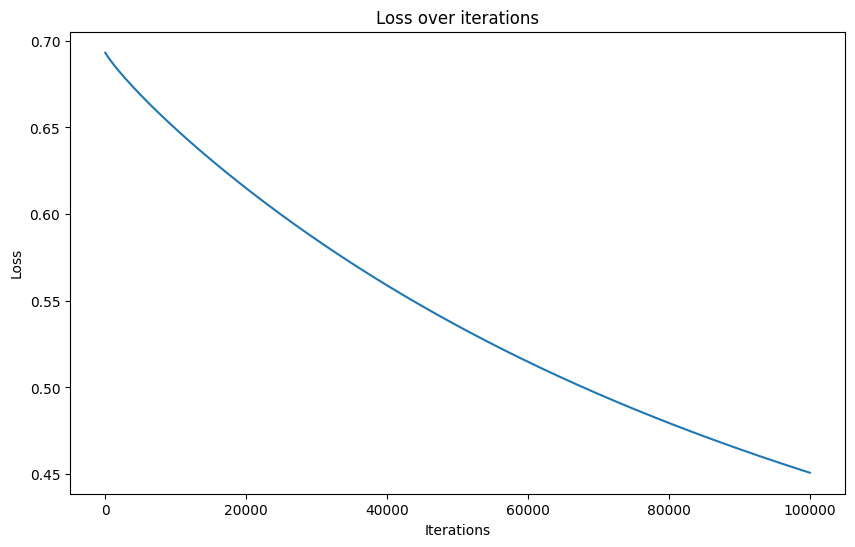

In [ ]:
# Plot the loss for the best model
plt.figure(figsize=(10, 6))
plt.plot(best_model['model'].loss)
plt.title("Loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

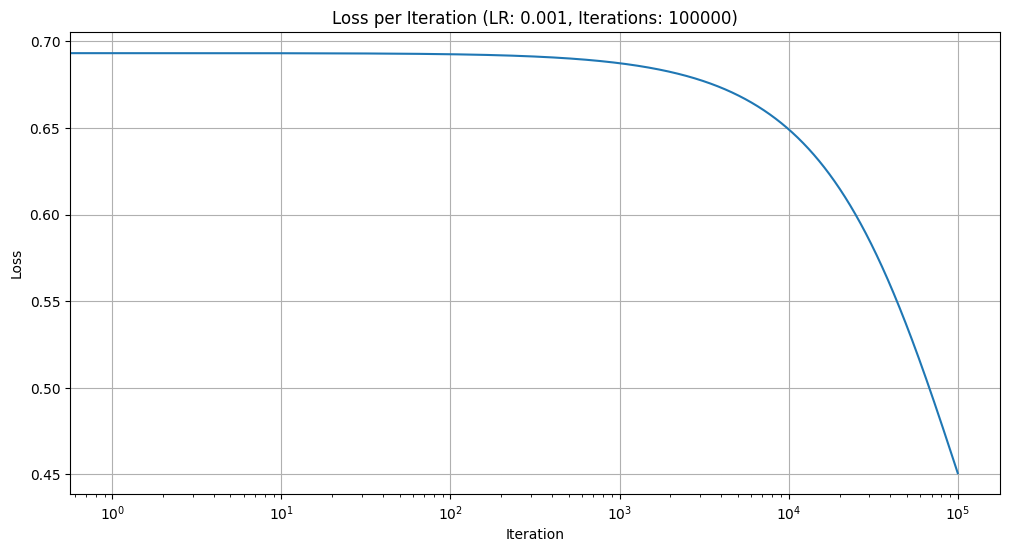

In [ ]:
# Plot the loss for each iteration of the best model
best_model_loss = best_model['model'].loss_per_iteration
iterations, losses = zip(*best_model_loss)

plt.figure(figsize=(12, 6))
plt.plot(iterations, losses)
plt.title(f"Loss per Iteration (LR: {best_model['learning_rate']}, Iterations: {best_model['iterations']})")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.xscale('log')  # Use log scale for x-axis to better visualize early iterations
plt.grid(True)
plt.show()

In [ ]:
final_loss = best_model['model'].loss_per_iteration[-1][1]
initial_loss = best_model['model'].loss_per_iteration[0][1]
print(f"Initial loss: {initial_loss:.4f}")
print(f"Final loss: {final_loss:.4f}")
print(f"Loss reduction: {initial_loss - final_loss:.4f} ({(1 - final_loss/initial_loss)*100:.2f}%)")

Initial loss: 0.6931
Final loss: 0.4508
Loss reduction: 0.2424 (34.97%)


In [ ]:
# Saving the best model
with open('best_logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model['model'], f)

print("Best model saved as 'best_logistic_regression_model.pkl'")

Best model saved as 'best_logistic_regression_model.pkl'
